<a href="https://colab.research.google.com/github/MMB019/Projet/blob/main/IAtitanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic=pd.read_excel("/content/drive/MyDrive/titanic.xls")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Traitement préleminaire

In [ ]:
columns=titanic.columns
columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
columns=columns.drop(['pclass','survived','sex','age'])
columns

Index(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat',
       'body', 'home.dest'],
      dtype='object')

In [ ]:
titanic.drop(columns,axis=1,inplace=True)
titanic.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [ ]:
titanic.isna().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

In [ ]:
titanic.dropna(axis=0,inplace=True)
titanic.isna().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

In [ ]:
variable_qualitative=titanic.select_dtypes('O').columns
variable_qualitative

Index(['sex'], dtype='object')

In [ ]:
variable_quantitative=titanic.columns.drop(variable_qualitative)
variable_quantitative

Index(['pclass', 'survived', 'age'], dtype='object')

## Analyse des données 

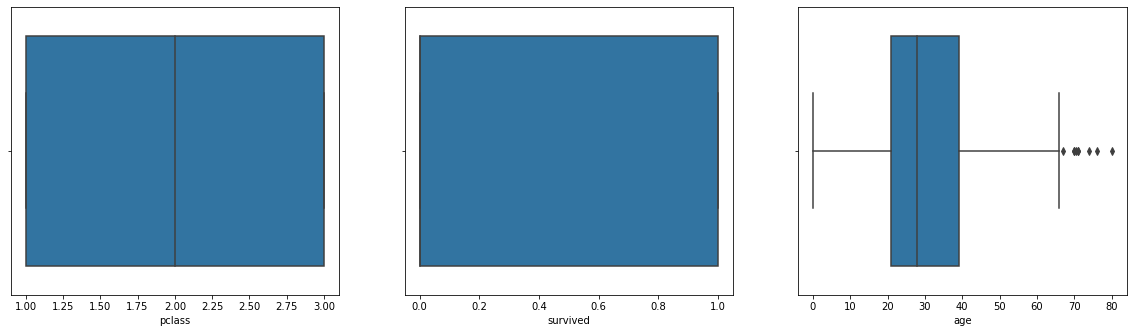

In [ ]:
plt.figure(figsize=(20,18))
for i,col in enumerate(variable_quantitative):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=col, data=titanic)

plt.show()

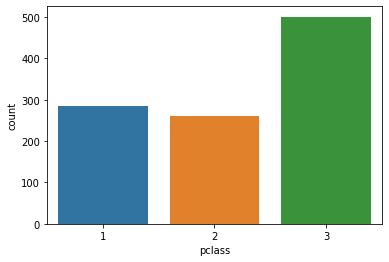

In [ ]:
sns.countplot(x="pclass", data=titanic)

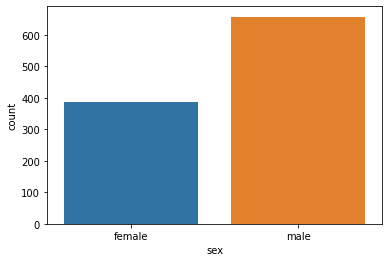

In [ ]:
sns.countplot(x="sex",data=titanic)

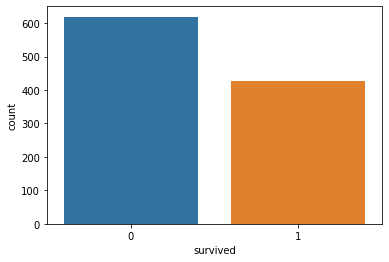

In [ ]:
sns.countplot(x="survived",data=titanic)

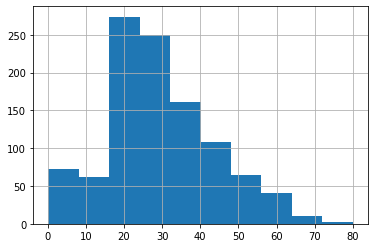

In [ ]:
titanic['age'].hist()

In [ ]:
titanic_corr=titanic.corr()
titanic_corr

,pclass,survived,age
pclass,1.000000,-0.320486,-0.408106
survived,-0.320486,1.000000,-0.055513
age,-0.408106,-0.055513,1.000000


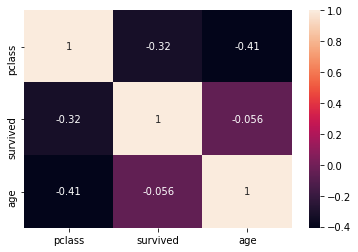

In [ ]:
sns.heatmap(titanic_corr,annot=True)

# Créaction de l'IA

In [ ]:
x=titanic.drop("survived",axis=1)
y=titanic['survived']
x.head()

,pclass,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,1,female,2.0000
3,1,male,30.0000
4,1,female,25.0000


In [ ]:
x['sex']=x['sex'].map({
    "female":0,
    "male":1
})
x.head()

,pclass,sex,age
0,1,0,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,1,30.0000
4,1,0,25.0000


## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

## cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(KNeighborsClassifier(1),x_train,y_train,cv=5).mean()

0.7368192187054463

## validation_curve

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_score,val_score=validation_curve(model,x_train,y_train,param_name="n_neighbors",param_range=k,cv=5)



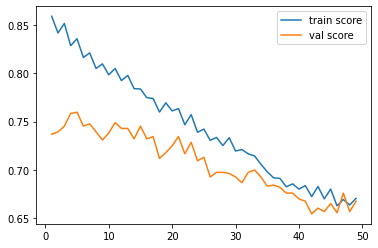

In [ ]:
plt.plot(k,train_score.mean(axis=1),label="train score")
plt.plot(k, val_score.mean(axis=1),label="val score")
plt.legend()
plt.show()

## GridSearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
param_grid=({
    "n_neighbors": np.arange(1, 20),
    "metric":["euclidean","manhattan"]
})

grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

In [ ]:
grid.fit(x_train,y_train)
grid.best_score_

0.7739806102081552

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13}

In [ ]:
model=grid.best_estimator_

In [ ]:
model.score(x_test,y_test)

0.719047619047619

### confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,model.predict(x_test))

array([[102,  17],
       [ 42,  49]])

## learning_curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N,train_score,val_score=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1, 1.0,10))


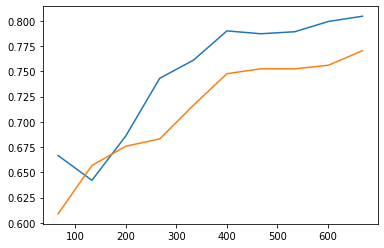

In [ ]:
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.show()